<a href="https://colab.research.google.com/github/jscienciadados/decision-tree/blob/main/Decision_Tree_Rpart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Criando Árvore de Decisão com o pacote - Rpart para a linguagem R

Criando um Dataframe

In [2]:
#?expand.grid
clima <- expand.grid(Tempo = c("Ensolarado","Nublado","Chuvoso"),
                     Temperatura = c("Quente","Ameno","Frio"),
                     Humidade = c("Alta","Normal"),
                     Vento = c("Fraco","Forte")) 

In [4]:
head(clima)

,Tempo,Temperatura,Humidade,Vento
,<fct>,<fct>,<fct>,<fct>
1,Ensolarado,Quente,Alta,Fraco
2,Nublado,Quente,Alta,Fraco
3,Chuvoso,Quente,Alta,Fraco
4,Ensolarado,Ameno,Alta,Fraco
5,Nublado,Ameno,Alta,Fraco
6,Chuvoso,Ameno,Alta,Fraco


In [5]:
# Vetor para selecionar as linhas
response <- c(1, 19, 4, 31, 16, 2, 11, 23, 35, 6, 24, 15, 18, 36)

In [6]:
# Gerando um vetor do tipo fator para a Variável target
play <- as.factor(c("Não Jogar", "Não Jogar", "Não Jogar", "Jogar",
                    "Jogar", "Jogar", "Jogar", "Jogar", "Jogar",
                    "Jogar", "Não Jogar", "Jogar", "Jogar", "Não Jogar")) 

In [7]:
# Dataframe Final 
tenis <- data.frame(clima[response, ], play)

In [8]:
head(tenis)

,Tempo,Temperatura,Humidade,Vento,play
,<fct>,<fct>,<fct>,<fct>,<fct>
1,Ensolarado,Quente,Alta,Fraco,Não Jogar
19,Ensolarado,Quente,Alta,Forte,Não Jogar
4,Ensolarado,Ameno,Alta,Fraco,Não Jogar
31,Ensolarado,Ameno,Normal,Forte,Jogar
16,Ensolarado,Frio,Normal,Fraco,Jogar
2,Nublado,Quente,Alta,Fraco,Jogar


In [9]:
# Instalando o pacote
install.packages("rpart", dependencies = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# carregando o pacote
library(rpart)

# Criando o Modelo

In [12]:
tennis_tree <- rpart(play ~ .,
                     data = tenis,
                     method = "class",
                     parms = list(split = "information"),
                     control = rpart.control(minsplit = 1))


# Árvore tipo Texto

In [13]:
tennis_tree

n= 14 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 14 5 Jogar (0.6428571 0.3571429)  
   2) Tempo=Nublado 4 0 Jogar (1.0000000 0.0000000) *
   3) Tempo=Ensolarado,Chuvoso 10 5 Jogar (0.5000000 0.5000000)  
     6) Humidade=Normal 5 1 Jogar (0.8000000 0.2000000)  
      12) Vento=Fraco 3 0 Jogar (1.0000000 0.0000000) *
      13) Vento=Forte 2 1 Jogar (0.5000000 0.5000000)  
        26) Tempo=Ensolarado 1 0 Jogar (1.0000000 0.0000000) *
        27) Tempo=Chuvoso 1 0 Não Jogar (0.0000000 1.0000000) *
     7) Humidade=Alta 5 1 Não Jogar (0.2000000 0.8000000)  
      14) Tempo=Chuvoso 2 1 Jogar (0.5000000 0.5000000)  
        28) Vento=Fraco 1 0 Jogar (1.0000000 0.0000000) *
        29) Vento=Forte 1 0 Não Jogar (0.0000000 1.0000000) *
      15) Tempo=Ensolarado 3 0 Não Jogar (0.0000000 1.0000000) *

# Visualizando de forma gráfica

In [14]:
install.packages("rpart.plot", dependencies = T)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘earth’




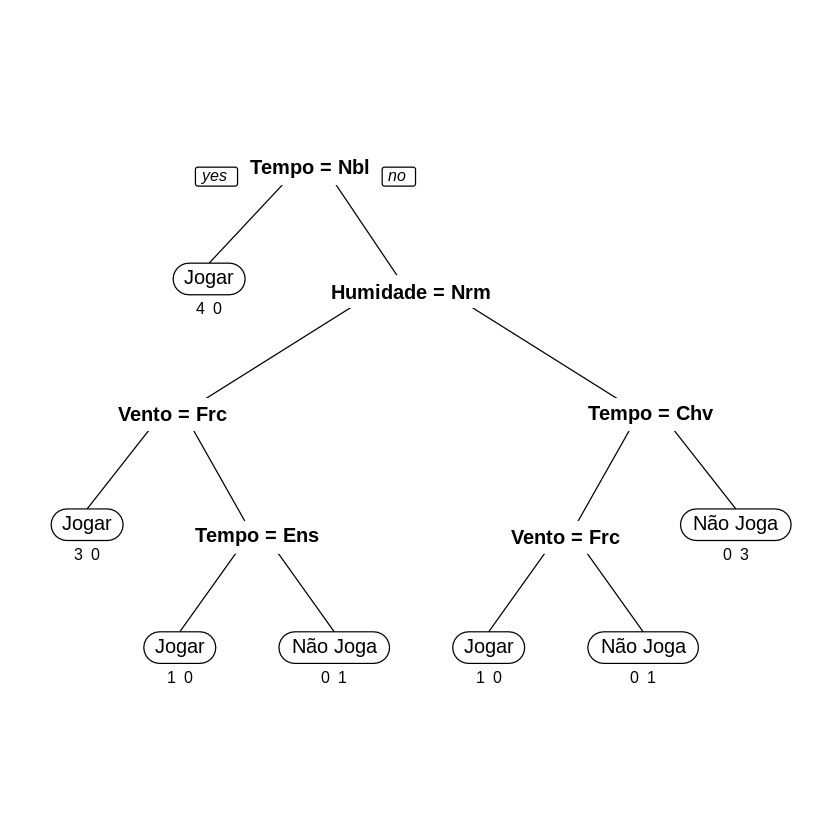

In [15]:
prp(tennis_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)

## Interpretando a árvore de decisão

Para ler os nós da árvore, basta iniciar a partir do nó superior, que corresponde aos dados de treinamento original e, em seguida,
começar a ler as regras. Observe que cada nó tem duas derivações: O ramo esquerdo significa que a regra superior é verdadeira
e a direita significa que ela é falsa.

À esquerda da primeira regra, você vê uma regra terminal importante (uma folha terminal), em um círculo, indicando
um resultado positivo, Jogar, que você pode ler como jogar tênis = Verdadeiro. Os números sob a folha terminal mostram
quatro exemplos afirmando que esta regra é "yes" e zero afirmando "no".

Considere o atributo "Vento" que pode ter os valores "Fraco" ou "Forte". Calcula-se então a entropia para cada um desses
valores e depois a diferença entre a entropia do atributo vento e a soma das entropias de cada um dos valores associados
ao atributo, multiplicado pela proporção de exemplos particionados de acordo com o valor (separados de um lado os exemplos
com Vento = "Fraco" e do outro lado Vento = "Forte").

Frequentemente, as regras de árvore de decisão não são imediatamente utilizáveis, e você precisa interpretá-las antes do uso.
No entanto, eles são claramente inteligíveis (e muito melhor do que um coeficiente de vetores de valores).


# Gerando Previões com o Modelo

In [16]:
# Dados
clima <- expand.grid(Tempo = c("Ensolarado","Nublado","Chuvoso"),
                           Temperatura = c("Quente","Ameno","Frio"),
                           Humidade = c("Alta","Normal"),
                           Vento = c("Fraco","Forte")) 

In [17]:
# Vetor para selecionar as linhas
response <- c(2, 20, 3, 33, 17, 4, 5)

In [18]:
# Novos dados
novos_dados <- data.frame(clima[response,])
View(novos_dados)

,Tempo,Temperatura,Humidade,Vento
,<fct>,<fct>,<fct>,<fct>
2,Nublado,Quente,Alta,Fraco
20,Nublado,Quente,Alta,Forte
3,Chuvoso,Quente,Alta,Fraco
33,Chuvoso,Ameno,Normal,Forte
17,Nublado,Frio,Normal,Fraco
4,Ensolarado,Ameno,Alta,Fraco
5,Nublado,Ameno,Alta,Fraco


In [19]:
predict(tennis_tree, novos_dados)

,Jogar,Não Jogar
2,1,0
20,1,0
3,1,0
33,0,1
17,1,0
4,0,1
5,1,0
